In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Empty DataFrame
Columns: [{"payload":{"allShortcutsEnabled":false, fileTree:{"":{"items":[{"name":"bola21.py", path:"bola21.py", contentType:"file"}, {"name":"kplr008191672-2009231120729_slc_t1.csv", path:"kplr008191672-2009231120729_slc_t1.csv", contentType:"file"}], totalCount:2}}, fileTreeProcessingTime:1.355135, foldersToFetch:[], repo:{"id":775833318, defaultBranch:"main", name:"app_curvadeluz", ownerLogin:"Mastevegm", currentUserCanPush:false, isFork:false, isEmpty:false, createdAt:"2024-03-22T06:10:58.000Z", ownerAvatar:"https://avatars.githubusercontent.com/u/113386784?v=4", public:true, private:false, isOrgOwned:false}, codeLineWrapEnabled:false, symbolsExpanded:false, treeExpanded:true, refInfo:{"name":"main", listCacheKey:"v0:1711088296.0", canEdit:false, refType:"branch", currentOid:"0166a22216985c4d41f45a71da6be3b294823389"}, path:"kplr008191672-2009231120729_slc_t1.csv".1, currentUser:null, blob:{"rawLines":["﻿200.324688, 6.15E+04\r", 200.3253691,6.16E+04\r, 200.3260502,6

In [ ]:
os.chdir("C:\\Users\\Administrador\\Downloads")
os.getcwd()


Agrega el radio del planeta con respecto al radio de la estrella: .1
Agrega el radio orbital del planeta: 2
Agrega el ángulo de inclinación del planeta (en grados): 30


KeyError: '200.324688'

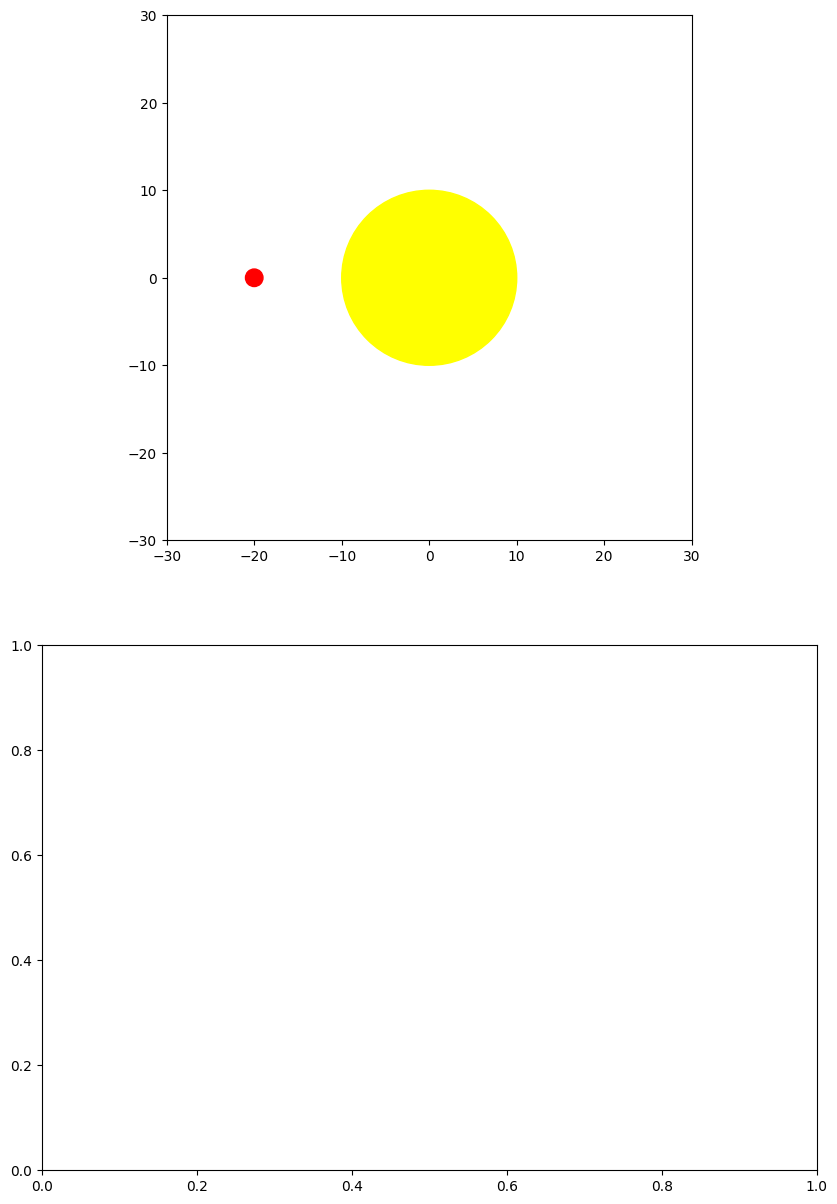

In [ ]:
import csv
workbook1= "exoplaa.csv"
df = pd.read_csv(workbook1)
print(df.size)

In [ ]:
print(df)

NameError: name 'animate' is not defined

In [ ]:
print(df.head())

In [ ]:
valor = df[["Tiempo","Flujo"]]
print(valor)

In [ ]:
ax = valor.plot(x="Tiempo",y="Flujo")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import Circle
import pandas as pd

# Parámetros
Radio_star = 10
while True:
    try:
        Rpf = float(input("Agrega el radio del planeta con respecto al radio de la estrella: "))
    except ValueError:
        print("Debes escribir un número positivo entre 0.01 y 0.4")
        continue

    if Rpf < 0.01:
        print("Debes escribir un número positivo entre 0.01 y 0.4")
        continue
    else:
        if Rpf > 0.4:
            print("Debe ser un número menor a 0.4")
            continue
        else:
            break

Radio_planet = Rpf * Radio_star

while True:
    try:
        R_orbf = float(input("Agrega el radio orbital del planeta: "))
    except ValueError:
        print("Debes escribir un número positivo entre 2 y 10")
        continue

    if R_orbf < 2:
        print("Debes escribir un número positivo entre 2 y 10")
        continue
    else:
        if R_orbf > 10:
            print("Debe ser un número menor a 10")
            continue
        else:
            break

Orbita = R_orbf * Radio_star

Pasos = 800

while True:
    try:
        Angulo_inclinacion = float(input("Agrega el ángulo de inclinación del planeta (en grados): "))
    except ValueError:
        print("Debes escribir un número entre -90 y 90.")
        continue

    if -90 <= Angulo_inclinacion <= 90:
        break
    else:
        print("El ángulo de inclinación debe estar entre 0 y 90 grados.")

Caja = 1.5 * Orbita
Inclinacion = np.radians(90 + Angulo_inclinacion)

# Función para calcular área de intersección de círculos
def area_interseccion_circulos(x1, y1, r1, x2, y2, z1, r2):
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    if d >= r1 + r2:  # No hay intersección
        return 0
    elif d <= abs(r1 - r2) and z1 < 0:  # El círculo 2 está completamente dentro del círculo 1
        return np.pi * (r2**2)
    elif d <= abs(r1 - r2) and z1 >= 0:  # El círculo 1 tapa completamente al círculo 2
        return 0
    else:  # Hay intersección
        a = (r1**2 - r2**2 + d**2) / (2 * d)
        h = np.sqrt(r1**2 - a**2)
        term1 = r1**2 * np.arccos((d**2 + r1**2 - r2**2) / (2 * d * r1))
        term2 = r2**2 * np.arccos((d**2 + r2**2 - r1**2) / (2 * d * r2))
        term3 = 0.5 * np.sqrt((-d + r1 + r2) * (d + r1 - r2) * (d - r1 + r2) * (d + r1 + r2))
        return term1 + term2 - term3

# Cargar datos desde el archivo CSV
workbook1 = "exoplaa.csv"
df = pd.read_csv(workbook1)

# Crear la figura y los ejes para dos subgráficas
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Configurar la primera subgráfica (axs[0]) para la animación
axs[0].set_xlim(-1 * Caja, Caja)
axs[0].set_ylim(-1 * Caja, Caja)
axs[0].set_aspect('equal')
circle_central = plt.Circle((0, 0), Radio_star, color='yellow')
axs[0].add_artist(circle_central)
circle = plt.Circle((-1 * Orbita, 0), Radio_planet, color='red')
axs[0].add_artist(circle)
time_text = axs[0].text(0.05, 0.95, '', transform=axs[0].transAxes, color='black')

# Configurar la segunda subgráfica (axs[1]) para el gráfico de brillo
axs[1].set_xlim(0, Pasos)
axs[1].set_ylim(98, 101)
axs[1].set_xlabel('Frame')
axs[1].set_ylabel('Brillo (%)')
area_dif_values = []
line, = axs[1].plot([], [], 'r-')
moving_circle = Circle((0, 100), 0.1, color='blue')
axs[1].add_patch(moving_circle)

# Graficar los datos de Kepler sobre la segunda gráfica
cut_limits = [(2454956.9, 2454959.59)]
for x_min, x_max in cut_limits:
    mask2 = (df['Tiempo'] >= x_min) & (df['Tiempo'] <= x_max)
    df_cut = df[mask2]
    # Escalar los datos de Kepler para que 99.7% sea el 100% de brillo
    brightness_scaled = df_cut['Flujo'] / (0.997 * df_cut['Flujo'].max()) * 100
    axs[1].scatter((df_cut['Tiempo'] - x_min) / (x_max - x_min) * Pasos, brightness_scaled, label=f'({x_min}, {x_max})', color='green')

# Agrega leyenda
axs[1].legend()

def init():
    circle.set_center((-1 * Orbita, 0))
    time_text.set_text('')
    line.set_data([], [])
    moving_circle.center = (0, 100)
    return circle, circle_central, time_text, line, moving_circle

def animate(frame):
    x = np.cos(0.5*np.pi + 2 * np.pi * frame / Pasos) * Orbita
    y = np.sin(0.5*np.pi + 2 * np.pi * frame / Pasos) * Orbita * np.cos(Inclinacion)
    z = np.sin(0.5*np.pi + 2 * np.pi * frame / Pasos) * Orbita
    circle.set_center((x, y))
    if z > 0:
        circle.set_zorder(0)
        circle_central.set_zorder(1)
        area_diferencia = 100
    else:
        circle.set_zorder(1)
        circle_central.set_zorder(0)
        area_diferencia = 100 * (1 - (area_interseccion_circulos(0, 0, Radio_star, x, y, z, Radio_planet)) / (np.pi * Radio_star**2))
    time_text.set_text('Brillo: {}'.format(area_diferencia))
    area_dif_values.append(area_diferencia)
    frames = list(range(len(area_dif_values)))
    line.set_data(frames, area_dif_values)
    if len(area_dif_values) > 0:
        moving_circle.center = (frame, area_dif_values[-1])
    else:
        moving_circle.center = (frame, 100)  # Valor de y predeterminado si area_dif_values está vacío
    return circle, circle_central, time_text, line, moving_circle

anim = animation.FuncAnimation(fig, animate, frames=Pasos, interval=1, init_func=init, blit=False, repeat=True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='jshtml')
plt.rcParams['animation.embed_limit'] = 256  # o cualquier otro valor en MB que necesites

anim = animation.FuncAnimation(fig, animate, frames=Pasos, interval=1, init_func=init, blit=False, repeat=True)

anim